# Continuous Control - DDPG

---

This notebook trains the ML-Agents environment [Reacher](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#reacher) environment using  Deep Deterministic Policy Gradient.

### 1. Start the Environment

First import the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import numpy as np
import time
from itertools import count

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='./Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examining the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 4. Training the agent using DDPG

DDPG adapts the ideas of Deep Q-Learning to the continuous action domain.
The actor network approximates the optimal policy deterministically (best believed action). 
The critic evaluates the optimal action value function using the best believed action given by the actor network.
Both the critic newtork and the actor network have 2 hidden layers with 128 nodes each.
The parameters used are:

| Parameter Description|  Variable  | Value |
|-----------|------------|------|
|Size of the replay buffer D|BUFFER_SIZE|1e6|
|Mini-batch size|BATCH_SIZE|256|
|Discount factor|GAMMA|0.99|
|$\\tau$ for soft update of target parameters|TAU|1e-3|
|Actor learning rate|LR|1e-3|
|Actor learning rate|LR|1e-3|
|L2 weight decay|WEIGHT_DECAY|0|

In [5]:
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

Episode 10, Average Score: 0.85, Max: 2.55, Min: 0.33, Time: 5.95
Episode 20, Average Score: 1.60, Max: 6.67, Min: 0.77, Time: 6.85
Episode 30, Average Score: 2.90, Max: 26.65, Min: 2.29, Time: 7.79
Episode 40, Average Score: 5.20, Max: 21.93, Min: 8.47, Time: 9.00
Episode 50, Average Score: 8.49, Max: 33.98, Min: 18.65, Time: 10.10
Episode 60, Average Score: 11.59, Max: 37.78, Min: 23.78, Time: 10.18
Episode 70, Average Score: 14.68, Max: 38.48, Min: 29.74, Time: 10.15
Episode 80, Average Score: 17.43, Max: 39.21, Min: 32.08, Time: 10.29
Episode 90, Average Score: 19.66, Max: 39.31, Min: 35.07, Time: 10.19
Episode 100, Average Score: 21.44, Max: 39.51, Min: 34.16, Time: 10.21
Episode 110, Average Score: 25.14, Max: 39.64, Min: 36.18, Time: 10.37
Episode 120, Average Score: 28.57, Max: 38.94, Min: 30.15, Time: 10.15

Environment solved in 25 episodes!	Average Score: 30.13


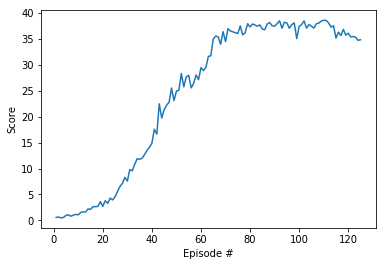

In [6]:
def ddpg(n_episodes=2000, max_t=2000):
    scores_deque = deque(maxlen=100)
    average_scores = []                                        # average of the score of the 20 agents for each episode
        
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()
        
        timestep = time.time()
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones, t)
            states = next_states                               # roll over states to next time step
            scores += rewards                                  # update the score (for each agent)            
            if np.any(dones):                                  # exit loop if episode finished
                break
        
        score = np.mean(scores)
        scores_deque.append(score)
        average_scores.append(score)      
        
        if i_episode % 10 == 0:
            print('\rEpisode {}, Average Score: {:.2f}, Max: {:.2f}, Min: {:.2f}, Time: {:.2f}'\
                .format(i_episode, np.mean(scores_deque), np.max(scores), np.min(scores), time.time() - timestep), end="\n")  
            
        if np.mean(scores_deque) >= 30.0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))            
            break            
            
    return average_scores


scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Testing a smart agent

In [ ]:
env.close()